# Regression Overview Lesson

- Regression is a supervised learning technique
    - Feed features and answer in 
        - get model/algorithm out
- Target is a continuous variable 
    - for example, how much something costs
    - New evaluation metrics, like RMSE (root mean squared error)
- Same data structure
    - one column - one feature, one row - one observation
- Simple regression 
    - One feature, linear
- Multiple regression 
    - multiple features, linear
- Polynomial regression 
    - non-linear        

## Acquire

- SQL
    - Writing queries
    - Using pd.read_sql
    - Some function to generate server url
- Get to know the data
    - .info, .describe, .head, .shape
    - Histograms, countplots

## Prepare

- Null values
    - Investigate nulls 
    - Determine meaning
    - Take action (drop, impute)
    - .dropna, .isna, .value_counts
- Clean data
    - Encode categoricals as dummies (pd.get_dummies( ))
    - Change data types (.astype(
    ))
    - Tidy data
        - One observation in each row
        - One feature in each column
- Handle Outliers
    - Drop
    - Cap
- Split our data
    - train_test_split
        - test subests of original data

## Explore

- Ask questions of our data
    - Is x causing y?
- Build visualizations
- Use statistics to determine significance

## Model

- Scale the data
    - MinMaxScaler
        - makes all numbers fall between 0 and 1
    - StandardScaler 
        - makes all numbers the number of standard deviations from the mean 
    - Do not explore on scaled data
    - Do not scale target variable
- Feature engineering
    - Encode patterns
    - Combine two or more fields
        - Especially if they're highly correlated
- Feature Selection
    - RFE (recursive feature elimination)
    - Select KBest
    - Curse of Dimensionality
        - The idea that if the dimensions of your dataframe extend out significantly, the less effective the model can be
- Actual Modeling
    - Fit
    - Predict
    - Evaluate (RMSE)

# Regression Acquire and Prep Lesson (Wrangle)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [11]:
df = pd.read_csv('winequality-red.csv')

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
df.shape

(1599, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


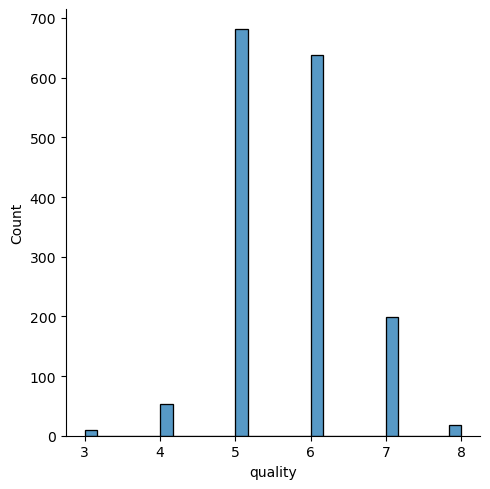

In [21]:
sns.displot(df['quality'])

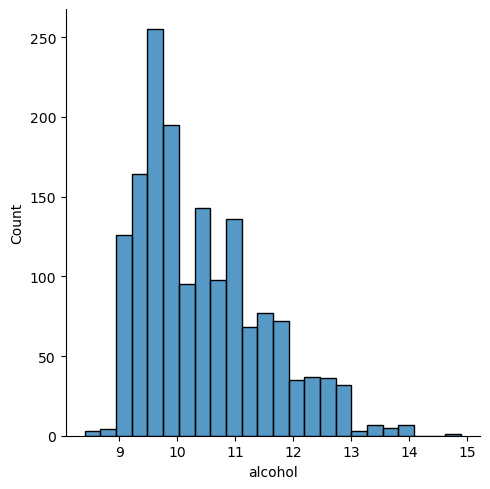

In [22]:
sns.displot(df['alcohol'])

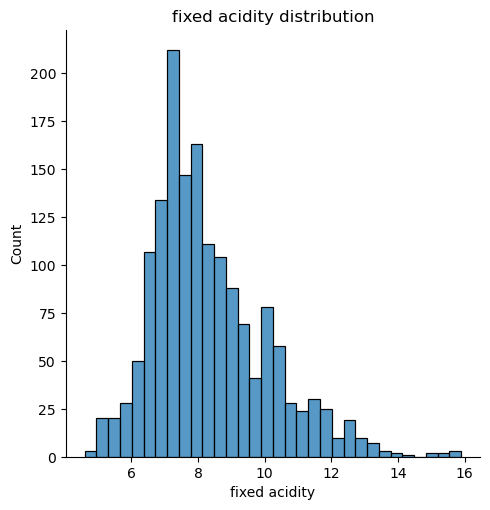

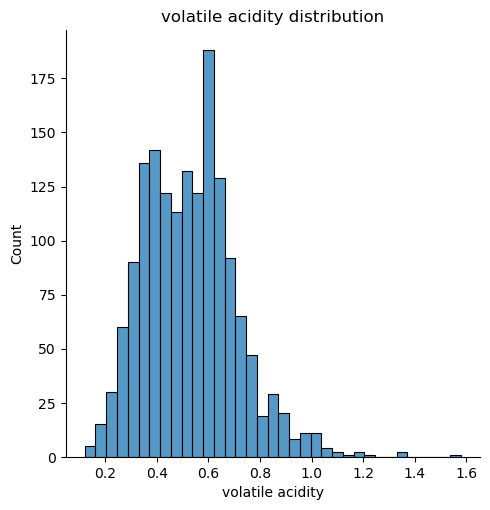

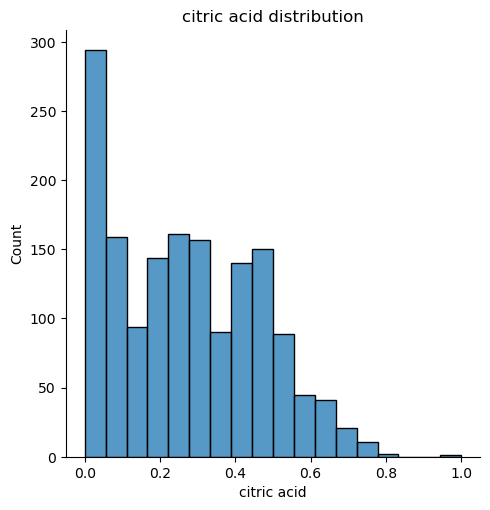

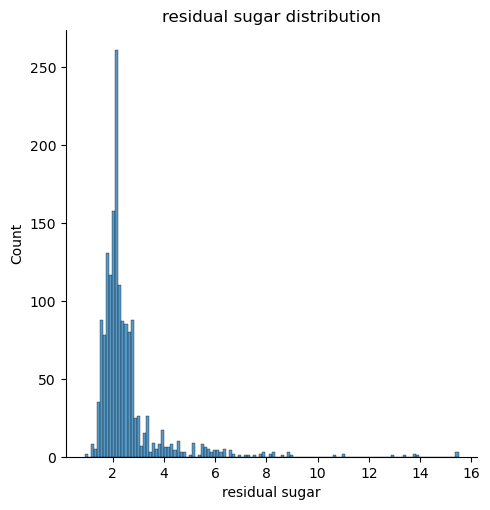

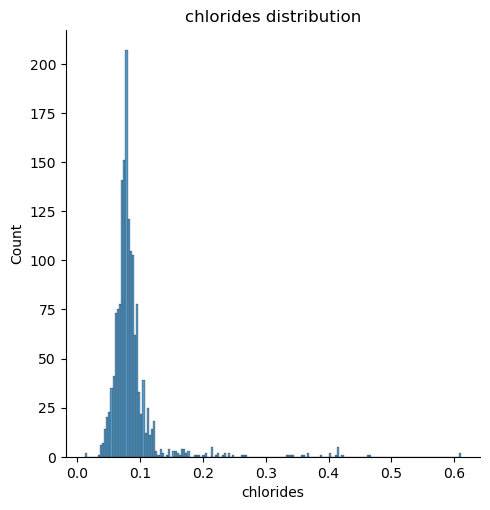

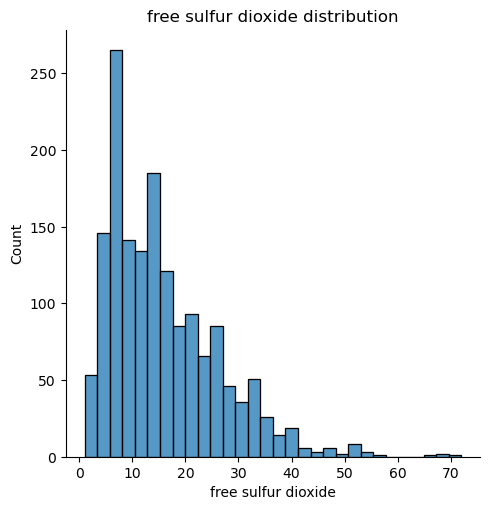

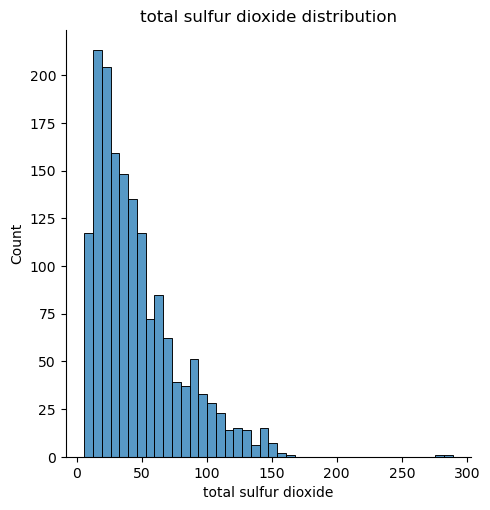

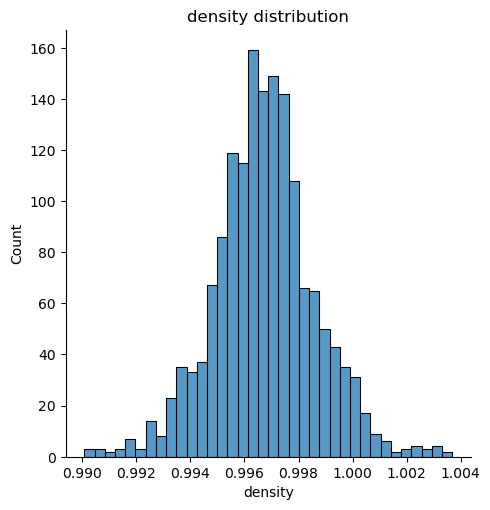

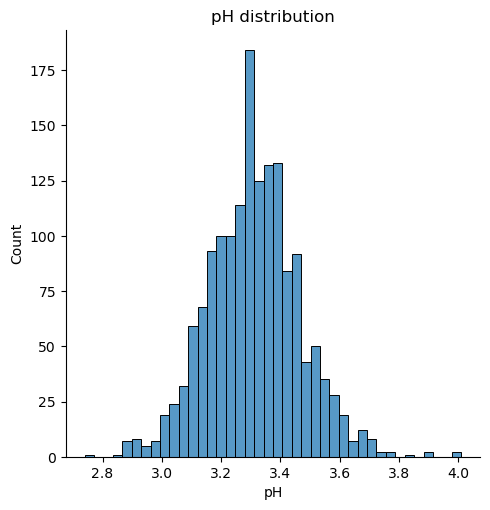

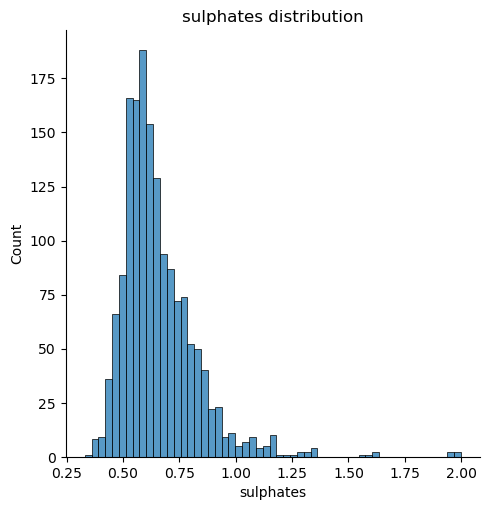

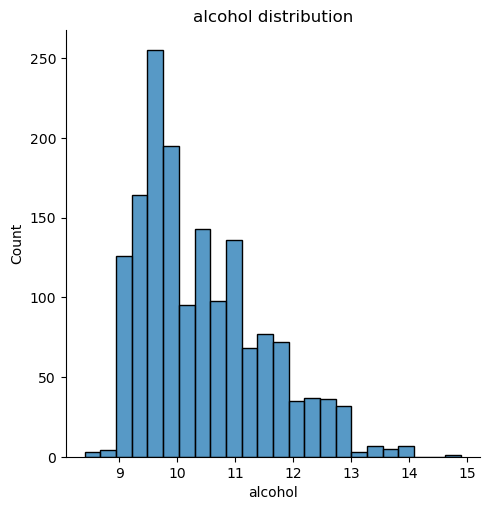

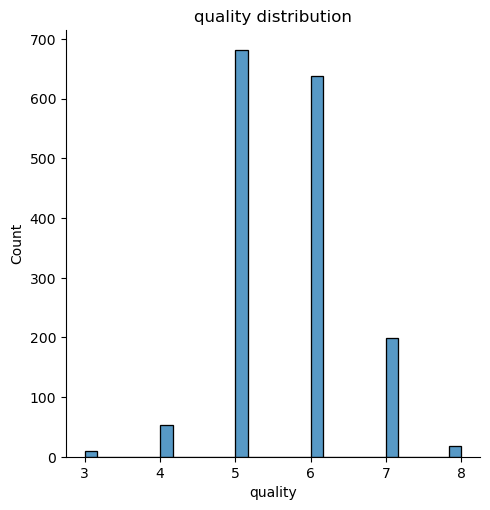

In [26]:
for col in df.columns:
    
    sns.displot(df[col])
    plt.title(f'{col} distribution')
    plt.show()